<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/BQm_EV6i0_j80CQZ8vcLvw/SN-web-lightmode.png" width=300 height=300 />


## Lab: Implementing the Functional API in Keras 

**Estimated time needed: 30 minutes**

In this lab, you will implement Keras functional API to build a neural network model. This lab will guide you through the steps of creating an input layer, adding hidden layers, and defining an output layer using the Functional API. 

##### Learning objectives: 

By the end of this lab, you will: 

- Use the Keras Functional API to build a simple neural network model. 

- Create an input layer, add hidden layers, and define an output layer using the Functional API. 

##### Prerequisites: 

- Basic understanding of Python programming 

- Familiarity with neural network concepts
  
- Keras and TensorFlow installed




#### Steps: 
**Step 1: Import Necessary Libraries**

Before you start, make sure to import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as `tensorflow.keras`. 


In [1]:
# Install TensorFlow
#!pip install tensorflow==2.16.2

import tensorflow as tf 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

**Explanation:**

`!pip install tensorflow==2.16.2` installs the specified version of TensorFlow.

 `tensorflow` is the main library for machine learning in Python. 

 `Model` is used to create a model with the Functional API. 

 `Input` and `Dense` are types of layers that you will use in your model. 

 
**Step 2: Define the Input Layer**

You will define the input shape for your model. For simplicity, let's assume you are working with a dataset where each input is a vector of length 20. 

 


In [2]:
input_layer = Input(shape=(20,))
print(input_layer)

<KerasTensor shape=(None, 20), dtype=float32, sparse=False, ragged=False, name=keras_tensor>


**Explanation:**

`Input(shape=(20,))` creates an input layer that expects input vectors of length 20.

`print(input_layer)` shows the layer information, helping you understand the type of information you can get about the layers.


**Step 3: Add Hidden Layers**

Next, you will add a couple of hidden layers to your model. Hidden layers help the model learn complex patterns in the data.


In [3]:
hidden_layer1 = Dense(64, activation='relu')(input_layer) 
hidden_layer2 = Dense(64, activation='relu')(hidden_layer1) 

**Explanation:**

`Dense(64, activation='relu')` creates a dense (fully connected) layer with 64 units and ReLU activation function. 

Each hidden layer takes the output of the previous layer as its input. 

**Step 4: Define the Output Layer**

Finally, you will define the output layer. Suppose you are working on a binary classification problem, so the output layer will have one unit with a sigmoid activation function. 


In [4]:
output_layer = Dense(1, activation='sigmoid')(hidden_layer2) 

**Explanation:**

`Dense(1, activation='sigmoid')` creates a dense layer with 1 unit and a sigmoid activation function, suitable for binary classification. 

**Step 5: Create the Model**

Now, you will create the model by specifying the input and output layers. 


In [5]:
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

**Explanation:**

`Model(inputs=input_layer, outputs=output_layer)` creates a Keras model that connects the input layer to the output layer through the hidden layers. 

`model.summary()` provides a summary of the model, showing the layers, their shapes, and the number of parameters. This helps you interpret the model architecture.


**Step 6: Compile the Model**

Before training the model, you need to compile it. You will specify the loss function, optimizer, and evaluation metrics. 


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Explanation:**

`optimizer='adam'` specifies the Adam optimizer, a popular choice for training neural networks. 

`loss='binary_crossentropy'` specifies the loss function for binary classification problems. 

`metrics=['accuracy']` instructs Keras to evaluate the model using accuracy during training. 

**Step 7: Train the Model**

You can now train the model using training data. For this example, let's assume `X_train` is your training input data and `y_train` is the corresponding label. 


In [7]:
# Example data (in practice, use real dataset) 

import numpy as np 
X_train = np.random.rand(1000, 20) 
y_train = np.random.randint(2, size=(1000, 1)) 
model.fit(X_train, y_train, epochs=10, batch_size=32) 

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5324 - loss: 0.6914   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.5352 - loss: 0.6890
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.5750 - loss: 0.6783
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.5700 - loss: 0.6807
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.5800 - loss: 0.6797
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.5579 - loss: 0.6784
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.6189 - loss: 0.6646
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.5825 - loss: 0.6691
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.6047 - loss: 0.6615
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.6077 - loss: 0.6569


**Explanation:**

`X_train` and `y_train` are placeholders for your actual training data. 

`model.fit` trains the model for a specified number of epochs and batch size. 

**Step 8: Evaluate the Model**

After training, you can evaluate the model on test data to see how well it performs. 


In [15]:
# Example test data (in practice, use real dataset) 

X_test = np.random.rand(200, 20) 
y_test = np.random.randint(2, size=(200, 1)) 
loss, accuracy = model.evaluate(X_test, y_test) 
print(f'Test loss: {loss}') 
print(f'Test accuracy: {accuracy}') 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4722 - loss: 0.7172 
Test loss: 0.7169584631919861
Test accuracy: 0.4650000035762787


**Explanation:**

`model.evaluate` computes the loss and accuracy of the model on test data. 

`X_test` and `y_test` are placeholders for your actual test data. 


### Dropout and Batch Normalization

Before we proceed with the practice exercise, let's briefly discuss two important techniques often used to improve the performance of neural networks: **Dropout Layers** and **Batch Normalization**.

#### Dropout Layers

Dropout is a regularization technique that helps prevent overfitting in neural networks. During training, Dropout randomly sets a fraction of input units to zero at each update cycle. This prevents the model from becoming overly reliant on any specific neurons, which encourages the network to learn more robust features that generalize better to unseen data.

**Key points:**
- Dropout is only applied during training, not during inference.
- The dropout rate is a hyperparameter that determines the fraction of neurons to drop.


#### Batch Normalization

Batch Normalization is a technique used to improve the training stability and speed of neural networks. It normalizes the output of a previous layer by re-centering and re-scaling the data, which helps in stabilizing the learning process. By reducing the internal covariate shift (the changes in the distribution of layer inputs), batch normalization allows the model to use higher learning rates, which often speeds up convergence.

**Key Points:**

- Batch normalization works by normalizing the inputs to each layer to have a mean of zero and a variance of one.
- It is applied during both training and inference, although its behavior varies slightly between the two phases.
- Batch normalization layers also introduce two learnable parameters that allow the model to scale and - shift the normalized output, which helps in restoring the model's representational power.


**Example of adding a Dropout layer in Keras:**


In [16]:
from tensorflow.keras.layers import Dropout, Dense, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(20,))

# Add a hidden layer
hidden_layer = Dense(64, activation='relu')(input_layer)

# Add a Dropout layer
dropout_layer = Dropout(rate=0.5)(hidden_layer)

# Add another hidden layer after Dropout
hidden_layer2 = Dense(64, activation='relu')(dropout_layer)

# Define the output layer
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Summary of the model
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

**Example of adding Batch Normalization in Keras:**


In [17]:
from tensorflow.keras.layers import BatchNormalization, Dense, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(20,))

# Add a hidden layer
hidden_layer = Dense(64, activation='relu')(input_layer)

# Add a BatchNormalization layer
batch_norm_layer = BatchNormalization()(hidden_layer)

# Add another hidden layer after BatchNormalization
hidden_layer2 = Dense(64, activation='relu')(batch_norm_layer)

# Define the output layer
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Summary of the model
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,825 (22.75 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 128 (512.00 B)

### Practice exercises


> #### **Note** : The evaluation metrics here are based on placeholder data (`X_test`, `y_test`). In practice, use real, sufficiently large datasets to draw valid conclusions.


#### Exercise 1: Add Dropout Layers

**Objective:** Learn to add dropout layers to prevent overfitting.

**Instructions:**
1. Add dropout layers after each hidden layer in the model.
2. Set the dropout rate to 0.5.
3. Recompile, train, and evaluate the model.


In [18]:
from tensorflow.keras.layers import Dropout, Input, Dense
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(20,))

# Add hidden layers with dropout
hidden_layer1 = Dense(64, activation='relu')(input_layer)
dropout1 = Dropout(0.5)(hidden_layer1)
hidden_layer2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(hidden_layer2)

# Define the output layer
output_layer = Dense(1, activation='sigmoid')(dropout2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4738 - loss: 0.7270   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.5029 - loss: 0.7093
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.5044 - loss: 0.7048
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.4807 - loss: 0.7020
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.5059 - loss: 0.6940
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4505 - loss: 0.7117 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.4949 - loss: 0.6966
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5286 - loss: 0.6906 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.4832 - loss: 0.6958
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.5233 - loss: 0.6904
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5116 - loss: 0.6918 
Test loss: 0.692169189453125
Test accuracy: 0.5149999856948853


<details>
    <summary>Click here for Solution</summary>

```python
from tensorflow.keras.layers import Dropout, Input, Dense
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(20,))

# Add hidden layers with dropout
hidden_layer1 = Dense(64, activation='relu')(input_layer)
dropout1 = Dropout(0.5)(hidden_layer1)
hidden_layer2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(hidden_layer2)

# Define the output layer
output_layer = Dense(1, activation='sigmoid')(dropout2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')
 ```   

</details>


#### Exercise 2: Change Activation Functions

**Objective:** Experiment with different activation functions.

**Instructions:**
1. Change the activation function of the hidden layers from ReLU to Tanh.
2. Recompile, train, and evaluate the model to see the effect.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5038 - loss: 0.7151   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.5252 - loss: 0.7015
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.4975 - loss: 0.7004
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.5243 - loss: 0.6939
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.5221 - loss: 0.6879
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.5008 - loss: 0.6912
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.4987 - loss: 0.6946
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.5155 - loss: 0.6898
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.5448 - loss: 0.6867
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.4974 - loss: 0.6935
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5656 - loss: 0.6896 
ReLU Test loss: 0.6912487149238586
ReLU Test accuracy: 0.564999997

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.5122 - loss: 0.7410 
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.5326 - loss: 0.7150
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.4880 - loss: 0.7540
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.5266 - loss: 0.7160
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.4707 - loss: 0.7291
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.5018 - loss: 0.7149
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.5201 - loss: 0.7093
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.4947 - loss: 0.7071
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.4992 - loss: 0.7102
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.5347 - loss: 0.6920
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5045 - loss: 0.6897 
ReLU Test loss: 0.6904075741767883
ReLU Test accuracy: 0.485000014

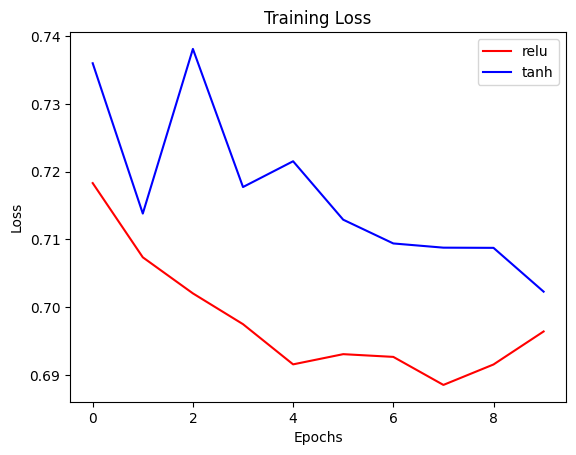

In [19]:
from tensorflow.keras.layers import Dropout, Input, Dense
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(20,))

# Add hidden layers with dropout
hidden_layer1 = Dense(64, activation='relu')(input_layer)
dropout1 = Dropout(0.5)(hidden_layer1)
hidden_layer2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(hidden_layer2)

# Define the output layer
output_layer = Dense(1, activation='sigmoid')(dropout2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
relu_act = model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'ReLU Test loss: {loss}')
print(f'ReLU Test accuracy: {accuracy}')

# Define the input layer
input_layer = Input(shape=(20,))

# Add hidden layers with dropout
hidden_layer1 = Dense(64, activation='tanh')(input_layer)
dropout1 = Dropout(0.5)(hidden_layer1)
hidden_layer2 = Dense(64, activation='tanh')(dropout1)
dropout2 = Dropout(0.5)(hidden_layer2)

# Define the output layer
output_layer = Dense(1, activation='sigmoid')(dropout2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
tanh_act = model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'ReLU Test loss: {loss}')
print(f'ReLU Test accuracy: {accuracy}')



#Plotting training losses for glorot_uniform and he_uniform inititalizers
import matplotlib.pyplot as plt
plt.plot(relu_act.history['loss'], label="relu", color='red')
plt.plot(tanh_act.history['loss'], label="tanh", color='blue')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(20,))

# Add hidden layers with Tanh activation
hidden_layer1 = Dense(64, activation='tanh')(input_layer)
hidden_layer2 = Dense(64, activation='tanh')(hidden_layer1)

# Define the output layer
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')
 ```   

</details>


#### Exercise 3: Use Batch Normalization

**Objective:** Implement batch normalization to improve training stability.

**Instructions:**
1. Add batch normalization layers after each hidden layer.
2. Recompile, train, and evaluate the model.


In [20]:
from tensorflow.keras.layers import Dropout, Input, Dense
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(20,))

# Add hidden layers with dropout
hidden_layer1 = Dense(64, activation='relu')(input_layer)
dropout1 = BatchNormalization()(hidden_layer1)
hidden_layer2 = Dense(64, activation='relu')(dropout1)
dropout2 = BatchNormalization()(hidden_layer2)

# Define the output layer
output_layer = Dense(1, activation='sigmoid')(dropout2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,081 (23.75 KB)

 Trainable params: 5,825 (22.75 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4768 - loss: 0.8949   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5500 - loss: 0.7386 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6007 - loss: 0.6716 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.6370 - loss: 0.6613
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.6160 - loss: 0.6456
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.6707 - loss: 0.6047
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6911 - loss: 0.5987 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.6931 - loss: 0.5916
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7152 - loss: 0.5688
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6992 - loss: 0.5738 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5467 - loss: 0.6775 
Test loss: 0.688218891620636
Test accuracy: 0.5299999713897705


<details>
    <summary>Click here for Solution</summary>

```python
from tensorflow.keras.layers import BatchNormalization

# Define the input layer
input_layer = Input(shape=(20,))

# Add hidden layers with batch normalization
hidden_layer1 = Dense(64, activation='relu')(input_layer)
batch_norm1 = BatchNormalization()(hidden_layer1)
hidden_layer2 = Dense(64, activation='relu')(batch_norm1)
batch_norm2 = BatchNormalization()(hidden_layer2)

# Define the output layer
output_layer = Dense(1, activation='sigmoid')(batch_norm2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')
 ```   

</details>


### Summary

By completing these exercises, students will:

1. Understand the impact of dropout layers on model overfitting.
2. Learn how different activation functions affect model performance.
3. Gain experience with batch normalization to stabilize and accelerate training.


**Conclusion:**

You have successfully created, trained, and evaluated a simple neural network model using the Keras Functional API. This foundational knowledge will allow you to build more complex models and explore advanced functionalities in Keras. 


Copyright © IBM Corporation. All rights reserved.
